# Cryptocurrency Clusters

In the code below I will use the K-Means algorithm to cluster cryptocurrencies based on data from a CSV file. 

The K-Means algorithm is a form of unsupervised machine learning. In fact K-Means is one of the most used unsupervised machine learning methods. K-Means like many other unsupervised machine learning methods using Clustering. Clustering is the process of grouping data points so together into clusters based on features or in other words grouping the data points based on how similar they are to one another. 

One example of K-Means is marketing. Amazon and Netflix have reccommendations for what you should buy / watch and they say something along the lines of "people like you enjoy". What is their definition of people like you? What are they basing this off? They are basing this off your past behavior and using unsupervised machine learning to cluster together their customers so they can present ads to you with a higher chance that you will buy this product

In [1]:
# Import dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Read in data
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Print out how many rows raw dataset has 
print(len(df_crypto))

1252


In [4]:
# Filter out all the cryptocurrencies that are not currently trading
df_crypto = df_crypto.loc[df_crypto["IsTrading"]==True,:]
print(len(df_crypto))
print(df_crypto["IsTrading"].unique())

1144
[ True]


In [5]:
# Drop the column IsTrading because now all the values are True so it adds no value to the dataframe
# Drop Unnamed column too
df_crypto = df_crypto.drop('IsTrading', axis=1)
df_crypto = df_crypto.drop('Unnamed: 0', axis=1)
df_crypto.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
# Count of how many rows in each coulmn are null values
df_crypto.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
# We can see that the TotalCoinsMined Column has a lot of null values which we have to remove
# in order to get accurate clusters

# Delete rows with null values
df_crypto = df_crypto.dropna()
print(len(df_crypto))

685


In [8]:
# Filter out cryptocurrencies where the total coins mined is less than or equal to 0
df_crypto = df_crypto.loc[df_crypto["TotalCoinsMined"]>0,:]
print(len(df_crypto))

532


In [9]:
# Make sure the filtering worked by finding the minimum value in the TotalCoinsMined column
print(df_crypto["TotalCoinsMined"].min())

41.99995383


In [10]:
df_crypto.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0


The dataframe still has some columns which are strings and not numeric objects.
Python can only use numeric values because it will perform calculations with these values.
So I have to either delete these columns or convert them to numeric values. 

In [11]:
# Delete CoinName
df_crypto = df_crypto.drop('CoinName', axis=1)
# Convert Algorithm and ProofType columns to numeric values
df_crypto = pd.get_dummies(df_crypto)
df_crypto.head()

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Scale the data so that columns that contain larger values do not unduly influence the outcome
df_crypto_scaled = StandardScaler().fit_transform(df_crypto)

In [13]:
print(len(df_crypto.columns))

377


Using the get_dummies function to convert the Algorithm and ProofType columns from string objects to numeric by adding a column for every value in each of these columns and having the rows in these new columns be binary values, caused the data to grow substantially in size going from 5 columns to 377 columns.

This is too many columns to work with, so I am going to use PCA to reduce the data down to principal components

In [14]:
# Inititate PCA model. For PCA there are two main options of what to input in
# 1 The number of principal components you want the data to output 
# 2 The explained variance

# In this code I am using the second option with an explained variance of 90%
pca = PCA(n_components=0.90)

# Fit data to model
crypto_pca = pca.fit_transform(df_crypto_scaled)

In [15]:
print(len(crypto_pca[0]))

274


Using PCA to reduce dimensionality the dataframe was reduced from 377 columns to 274. 

274 is still alot of columns but it explains 90% of the original data's variance which is important

In [25]:
# Perform t-SNE (t-distributed Stochastic Neighbor Embedding) on the dataset
tsne = TSNE(learning_rate=5)
tsne_features = tsne.fit_transform(crypto_pca)

In [17]:
tsne_features.shape

(532, 2)

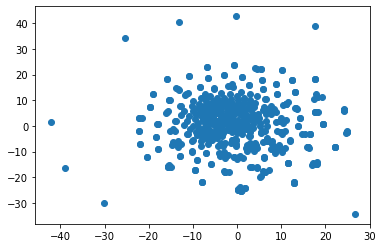

In [26]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

Above is a scatter plot result of using T-SNE. Viewing this plot there are no obvious clusters in the data. There are certainly outliers but the no obvious clusters

C:\Users\Collin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


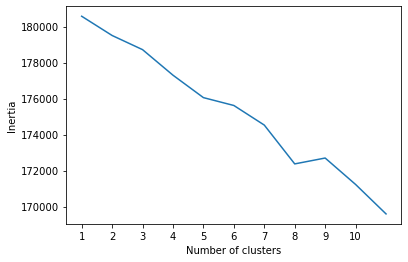

In [32]:
inertia = []
# Range of k values to test
k = [1,2,3,4,5,6,7,8,9,10,11]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    # Inertia is how far on average the data points are from their respective centroid. 
    # The euclidean distance
    # We want the k-value with the minimum inertia
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Above is the elbow plot for k-means it shows the interia for each value of k. The plot appears to be almost linear when it is supposed to look more like 1 / x^2 with a curve approaching 0 so that there is an elbow to the plot. 

Since the plot is not really an elbow plot it is very hard to choose an optimal value of k. The optimal value of k is a small value of k so as to not create too many clusters while also having a low inertia. From the plot above the the inertia is just dropping steadily as k increases so there is no optimal value of k. 

Since there is no optimal value of k I am going to conclude that the cryptocurrencies cannot be clusters

# Client Recommendation

After cleaning up the cryptocurency data, I used unsupervised learning more spefically k-means to test if there were any clusterings in the cryptocurrencies. The result of the k-means model was that cryptocurrencies cannot be clustered / group